In [ ]:
#1/28/2023
#Collin ZHeng       zheng.1947@buckeyemail.osu.edu
#This code is used for sorting data by time

#Purpose: Based on the figure 4 in 'Search for millicharged particles in proton-proton collisions at srqt (s) = 13 TeV',
# it claims the 'Beam muon' will take around -10ns(why) to 10 ns to passing through the milliqan detector.
#With this specific range time, we can use it to extract some properties of beam muon like max(Npe)/min(Npe).
#To -do: To achive this purpose, we can do the subtraction for ajacent pulse data base on 'time', 
#and then keep adding up the time(after subtraction) until the result is bigger than the range of time mentioned in the paper.
#Mike suggested that it is acceptable to expand the 'range of time' (havn't done yet)

In [9]:
import ROOT as r
import numpy as np
from ROOT import *


In [7]:

chain = r.TChain("t")
chain.Add('/store/user/mcarrigan/trees/v29/MilliQan_Run591.*_v29_firstPedestals.root')
chain.GetEntry(3189)
e= chain.time
#print(list(enumerate(e))
sorted_time = sorted (enumerate(e),key=lambda x: x[1])   #return (index,time)
#print(sorted_time)

i = 0
#the following table are for demostration only

for index, time in sorted_time:

    if i == 0:
        print("index" + "  time(ns)  " + "layer  " +   "    nPE" + "    chan" + "    area" +"    duration" + 
              "     height   ")
        print(str(index) + "      " + str(time) +  "     "  +  str(chain.layer[index]) + "    " + str(chain.nPE[index])
             + "   "  +   str(chain.chan[index]) +"     " + str(chain.area[index]) +"     " +
              str(chain.duration[index]) +"     " + str(chain.height[index]))
        i += 1
    else:
        print(str(index) + "     " + str(time) + "     "  + str(chain.layer[index]) + "    " + str(chain.nPE[index])
             + "   "  +   str(chain.chan[index]) + "     " + str(chain.area[index]) +"     " +
              str(chain.duration[index]) +"     " + str(chain.height[index]))

index  time(ns)  layer      nPE    chan    area    duration     height   
4      50.0     2    14432.255859375   74     14432.255859375     2507.489990234375     16.973735809326172
1     902.5     2    2874.048095703125   35     2874.048095703125     182.489990234375     77.69953918457031
0     1317.5     1    13.372377395629883   28     10697.90234375     257.489990234375     249.32778930664062
2     1317.5     3    13.499902725219727   61     17549.873046875     254.989990234375     470.9924621582031
3     1685.0     3    2.0418310165405273   63     1837.6478271484375     159.989990234375     52.669761657714844


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


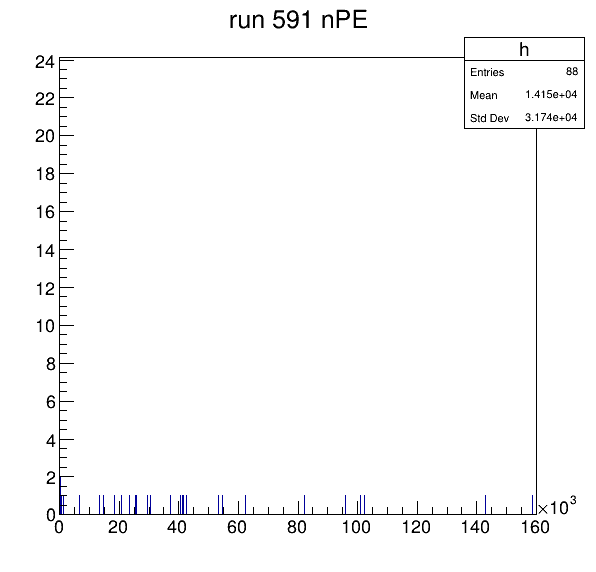

In [25]:
entry = 0
c1 = TCanvas("c1","run 591 nPE",10,10,600,600)
h = TH1F("h","run 591 nPE",10000,0,160000)

entry = 0

while entry < chain.GetEntries():

    chain.GetEntry(entry)
    e= chain.time
    sorted_time = sorted (enumerate(e),key=lambda x: x[1])   #return (index,time)
    time = []
    index_list = []
    for index,t in sorted_time:
        time.append(t)
        index_list.append(index)
    new_list = [y - x for x, y in zip(time[:], time[1:])]
    #print(new_list)
    new_list1 = [y + x for x, y in zip(new_list[:], new_list[1:])]
    new_list2 = [y + x for x, y in zip(new_list1[:], new_list1[1:])] #need to fix this later
    
    
    tTime = 50 #assuming it take 50ns for the beam muon to pass through 4 layers of bar detector. This should be change into a cut in the future
    for i,t3layer in enumerate(new_list2):
        if t3layer < tTime:
            #time for passing through 3 layer from the end of first layer of bar detector to last layer of bar detector
            #print(chain.layer[index_list[i]],chain.layer[index_list[i+1]],chain.layer[index_list[i+2]],chain.layer[index_list[i+3]])
            #the pulse being register at specific layer
            if chain.chan[index_list[i]] < 68 and chain.chan[index_list[i+1]] < 68 and chain.chan[index_list[i+2]] < 68 and chain.chan[index_list[i+3]] < 68:
            #only focus on bar detector
                lay1t = chain.layer[index_list[i]] #layer 1 
                lay2t = chain.layer[index_list[i+1]]
                lay3t = chain.layer[index_list[i+2]]
                lay4t = chain.layer[index_list[i+3]]#layer 4
            if lay1t == 0 and lay4t ==3 and lay1t < lay2t and lay2t < lay3t and lay3t < lay4t: #Mike suggest Change this into checking the time for three layers.
                
                #print(index_list)
                #print(i)
                
            
                #print(lay1t,lay2t,lay3t,lay4t)
                #print("done")
                h.Fill(chain.nPE[index_list[i]])
                h.Fill(chain.nPE[index_list[i+1]])
                h.Fill(chain.nPE[index_list[i+2]])
                h.Fill(chain.nPE[index_list[i+3]])
                #print(entry)
            
    
    
    
    
    
    entry += 1

h.Draw()  
c1.Draw()  